# **`Analyse bivariée`**

# Analyse entre variables quantitatives

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
iris = sns.load_dataset('iris')


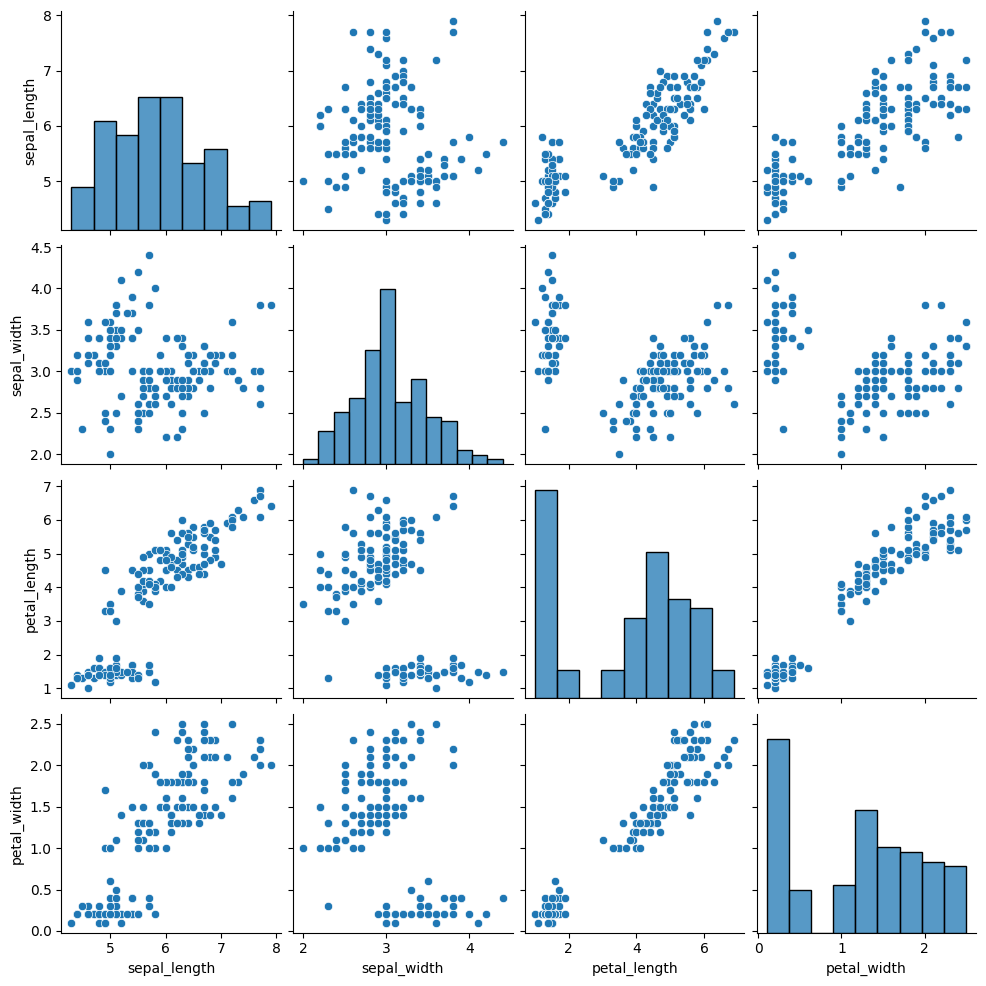

In [4]:
sns.pairplot(iris, kind = "scatter")

On constate que plus la largeur du petal augmente, plus sa longueur augmente. Il semble donc y avoir une **relation linéaire** entre petal_length et petal_width.
Il semble aussi y avoir une relation monotone entre petal_length et sepal_length.
Vérifions tout ca avec des tests.

Text(0, 0.5, 'Fréquence')

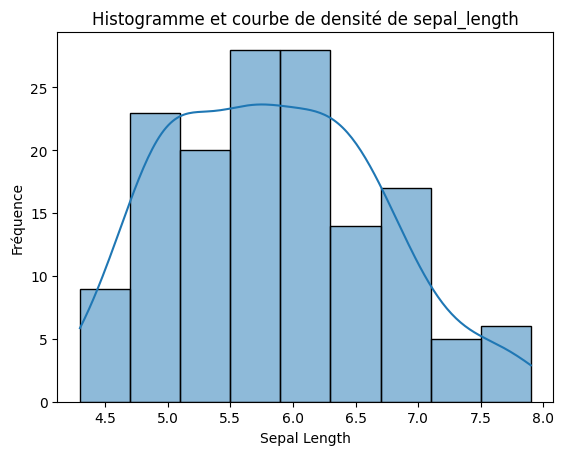

In [10]:
sns.histplot(data=iris, x='sepal_length', kde=True)

plt.title('Histogramme et courbe de densité de sepal_length')
plt.xlabel('Sepal Length')
plt.ylabel('Fréquence')

Text(0, 0.5, 'Fréquence')

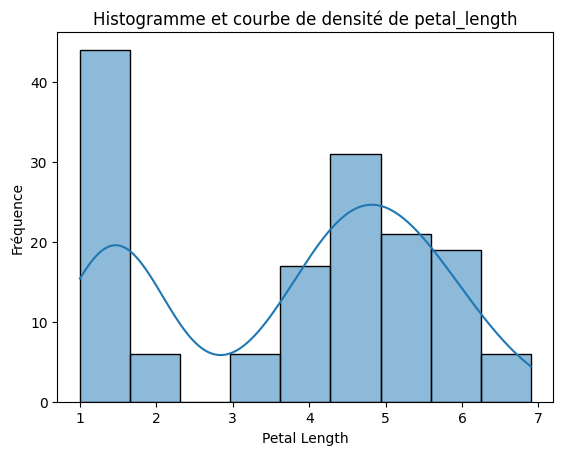

In [12]:
sns.histplot(data=iris, x = 'petal_length', kde = True)

plt.title('Histogramme et courbe de densité de petal_length')
plt.xlabel('Petal Length')
plt.ylabel('Fréquence')

In [19]:
for var in ["sepal_length", "petal_length"]:
    _, p_value = st.shapiro(iris[var])
    print(f"Test de normalité de {var}: p-value = {p_value}")

Test de normalité de sepal_length: p-value = 0.010181161454691156
Test de normalité de petal_length: p-value = 7.412263135173186e-10


sepal_length et petal_length ne suivent pas une distribution normale.Le test de pearson n'est pas très approprié dans ce cas. Voyons la correlation de spearman.

In [21]:
st.spearmanr(iris["sepal_length"], iris["petal_length"])

SignificanceResult(statistic=0.881898126434986, pvalue=3.4430872780470036e-50)

Il y a donc une forte correlation positive monotone entre sepal_length et petal_length.

In [22]:
st.kendalltau(iris["sepal_length"], iris["petal_length"])

SignificanceResult(statistic=0.7185159275387326, pvalue=1.1691259442824266e-36)

# Analyse entre variables qualitatives

In [23]:
titanic = sns.load_dataset('titanic')

In [24]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Text(0, 0.5, 'Nombre de passagers')

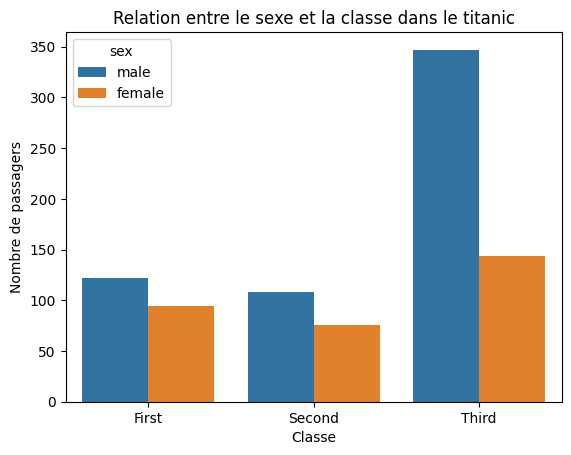

In [28]:
sns.countplot(data = titanic, x = 'class', hue = "sex")
plt.title('Relation entre le sexe et la classe dans le titanic')
plt.xlabel('Classe')
plt.ylabel('Nombre de passagers')

Il semble qu'il y a plus d'homme qui prennent en troisième classe.

In [30]:
contingency_tab = pd.crosstab(titanic['class'], titanic['sex'])
contingency_tab

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


In [32]:
chi2_stat, p_value, dof, expected_freq = st.chi2_contingency(contingency_tab)
print(f"Chi-squared statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected_freq)

Chi-squared statistic: 16.971499095517114
P-value: 0.00020638864348233114
Degrees of freedom: 2
Expected frequencies:
[[ 76.12121212 139.87878788]
 [ 64.84399551 119.15600449]
 [173.03479237 317.96520763]]


Il y a donc une liaison. Verifions l'intensité de la relation.

In [33]:
from pydoc import cram
n = contingency_tab.sum().sum()
min_dim = min(contingency_tab.shape) - 1
cramers_v = np.sqrt((chi2_stat / n) / min_dim)
print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.1380133986221395


Il n'y a pas une forte relation entre le sexe et la classe.

# Analyse entre variable quantitative et variable qualitative.

Nous allons travailler avec le jeu de données iris.

In [34]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Text(0.5, 1.0, 'Relation entre species et sepal_length')

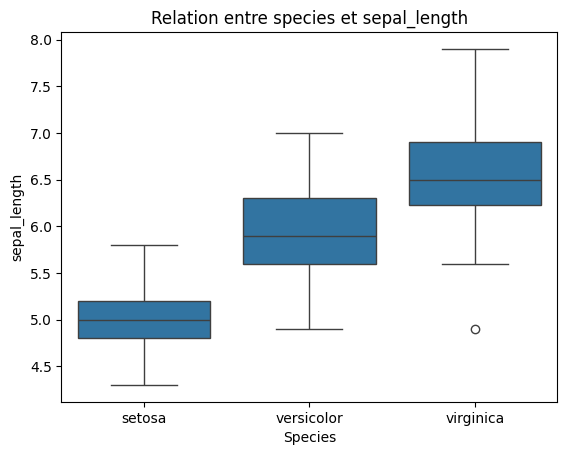

In [37]:
sns.boxplot(data = iris, x = "species", y = 'sepal_length')
plt.xlabel('Species')
plt.ylabel('sepal_length')
plt.title('Relation entre species et sepal_length')

Il semble y avoir une relation entre l'espece et la longueur du sepale. En effet, en fonction de l'espece, la longueur du sepale est plus ou moins grande, et moyenne pour versicolor. Verifions cela

In [43]:
setosa = iris[iris['species'] == 'setosa']['sepal_length']
versicolor = iris[iris['species'] == 'versicolor']['sepal_length']
virginica = iris[iris['species'] == 'virginica']['sepal_length']

_, setosa_p_value = st.shapiro(setosa)
_, versicolor_p_value = st.shapiro(versicolor)
_, virginica_p_value = st.shapiro(virginica)

print(f"Test de normalité de setosa: p-value = {setosa_p_value}")
print(f"Test de normalité de versicolor: p-value = {versicolor_p_value}")
print(f"Test de normalité de virginica: p-value = {virginica_p_value}")


Test de normalité de setosa: p-value = 0.4595131499174534
Test de normalité de versicolor: p-value = 0.4647370359250263
Test de normalité de virginica: p-value = 0.25831474614079086


In [44]:
t_stat, t_p_value = st.ttest_ind(setosa, virginica)
print(f"Test t de Student: t-statistic = {t_stat}, p-value = {t_p_value}")

Test t de Student: t-statistic = -15.386195820079404, p-value = 6.892546060674059e-28
